In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_sens_spec(y,pred):
    tp = np.sum(np.logical_and(y,pred==y))
    tn = np.sum(np.logical_and(1-y,pred==y))
    fp = np.sum(np.logical_and(pred,pred!=y))
    fn = np.sum(np.logical_and(1-pred,pred!=y))
    
    sens = tp/(tp+fn)
    spec = tn/(tn+fp)
    acc = (tp+tn)/(tp+tn+fp+fn)
    return [sens,spec,acc]

In [3]:
table = pd.read_csv("../Data/OHE_Eth.csv")
y = table["OverallPoF"].to_numpy()
X = table.iloc[:,1:17].to_numpy()

In [4]:
from sklearn.linear_model import LinearRegression
def poly_fit(vals,polysize):
    xs = np.array([a for a in range(vals.shape[1])])
    xfs = []
    for a in range(1,polysize+1):
        xfs.append(xs**a)
    xfs = np.transpose(np.array(xfs))
    
    coefs = []
    scores = []
    for a in range(vals.shape[0]):
        lin = LinearRegression()
        lin.fit(xfs,vals[a])
        score = lin.score(xfs,vals[a])
        v = lin.coef_
        v = np.hstack((v,lin.intercept_))
        coefs.append(v)
        scores.append(score)
    coefs = np.array(coefs)
    return coefs,np.mean(scores)

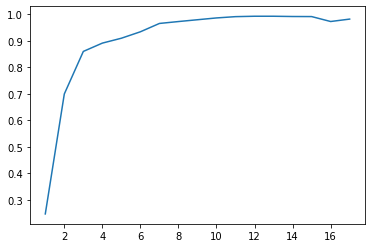

In [5]:
scores = []
for a in range(1,18):
    scores.append(poly_fit(X,a)[1])
plt.plot(range(1,18),scores)

In [6]:
scores

[0.24700641337571166,
 0.6998243376565005,
 0.8603826650608599,
 0.8917213988897426,
 0.9101875286984142,
 0.9344972106617496,
 0.9659363045544385,
 0.9731150679372511,
 0.9799575133555942,
 0.986751938544136,
 0.9916129023599997,
 0.993131216938961,
 0.9931163996249865,
 0.99213268818912,
 0.9918794904915166,
 0.9732527804834165,
 0.9823573425714893]